[View in Colaboratory](https://colab.research.google.com/github/calicinio/Testando/blob/master/Exerc%C3%ADcio_Computacional_IV_Valida%C3%A7%C3%A3o_Cruzada_e_kNN.ipynb)


## Validação Cruzada

Neste notebook iremos utilizar validação cruzada para definir os parâmetros do algoritmo de classificação de padrões simples e muito utilizado.

O algoritmo dos **k vizinhos mais próximos** (do inglês *k-nearest neighors* - kNN) consiste de duas etapas:

* durante o treinamento, o classificador simplesmesmente armazena todas os observações do conjunto de treinamento;
* durante o teste, o classificador *kNN* classifica cada observação comparando-a com todas as observações do conjunto de treinamento. Em seguida, define sua classe como a classe  majoritária das $k$ observações do conjunto de teste mais similares a observação em questão.

Para classificar cada nova observação durante o teste, inicialmente o classificador deve calcular a distância entre esta observação e todas as observações do conjunto de treinamento. Em seguida, dado as $k$ observações mais próximas, a saída do classificador corresponde a classe majoritária.

In [0]:
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

X,y = make_classification(n_samples= 1000, n_features=2, n_classes = 2, n_clusters_per_class=2, 
                          n_informative=2, n_redundant=0, n_repeated=0,
                         class_sep = 0.6)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

Inicialmente você deve implementar o algoritmo de classificação $kNN$.

A função abaixo recebe como argumentos:

* a matriz $X_{train}$ de dimensão $n_{train} \times d$, onde $n_{train}$ corresponde ao número de observaçõs do conjunto de treinamento, que representa as observações do conjunto de treinamento;
* o vetor $y_{train}$ de tamanho $n_{train}$, que representa a classe correspondente de cada observação do conjunto de treinamento;
* a matriz $X_{test}$ de dimensão $n_{test} \times d$, onde $n_{test}$ corresponde ao número de observaçõs do conjunto de teste, que representa as observações do conjunto de teste;
* a constante $k$, que representa o número de vizinhos utilizados pelo algoritmo para realizar a classificação de cada amostra.

A função deve retornar um vetor $\hat{y}_{test}$, contendo a classificação de cada observação do conjunto de teste.


In [0]:
def knn(X_train, y_train, X_test, k):
  
  n_train, d_train = X_train.shape
  n_test, d_test = X_test.shape

  y_hat = -1*np.ones(n_test)

  mtx_dist = np.zeros((n_train, n_test))

  for i in range(n_train):
    for j in range(n_test):
      mtx_dist[i][j] = cdist([X_test[j]], [X_train[i]])

  for j in range(n_test):
    classes = np.zeros(k)
    #armazena os k menores valores
    values_temp = np.sort(mtx_dist[:, j])[0:k]

    idx_temp = np.zeros(k)
    for g in range(k):
      #pego os indíces dos k menores distâncias
      idx_temp[g] = np.where( mtx_dist[:,j] == values_temp[g] )[0][0]

    #verifica a classe majoritária
    classes = list(y_train[np.array(idx_temp, dtype="int")])

    idx_maior = 0
    cont = 0
    for x in set(classes):
      temp = classes.count(x)
      if temp > cont:
        idx_maior = x
    
    #retorna o valor que mais se repete (moda)
    y_hat[j] = idx_maior
  
  return y_hat

Valide sua implementação com o código abaixo. 

O codigo abaixo imprime o conjunto de treinamento, executa o $kNN$ para $k=3$, imprime o valor da acurácia e plota as classificações de referência e as obtidas para o conjunto de testes.

Acurácia: 0.713


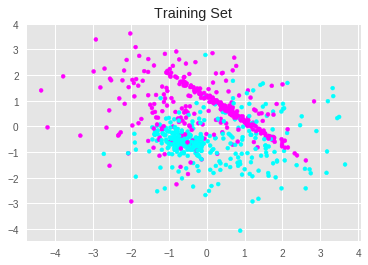

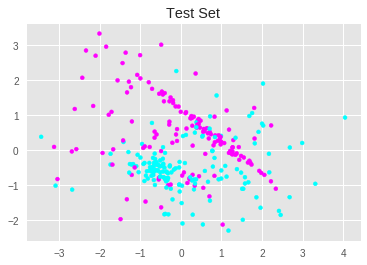

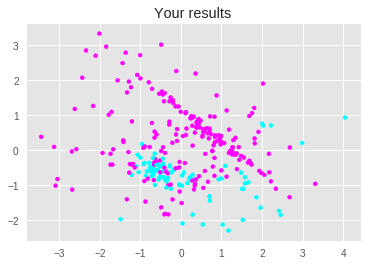

In [17]:
plt.figure(1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s =15, cmap="cool")
_ = plt.title('Training Set')

y_hat = knn(X_train, y_train, X_test, 4)

accuracy = (y_hat == y_test).mean()
print('Acurácia: %.3f'% accuracy)

plt.figure(2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test,s=15, cmap="cool")
_ = plt.title('Test Set')

plt.figure(3)
plt.scatter(X_test[:,0], X_test[:,1], c=y_hat,s=15,  cmap="cool")
_ = plt.title('Your results')


O algoritmo $kNN$ possui apenas um hiperparâmetro, a constante $k$. A escolha desse hiperparâmetro influencia o desempenho do algoritmo.

Para se escolher o valor de $k$ iremos utilizar a técnica de validação cruzada, especificamente *k-fold cross validation*.

Implemente a técnica de validação cruzada *k-fold cross validation* (com 5 partições) para selecionar o melhor valor de $k$ do problema acima.

Plote o valor da acurácia média do conjunto de validação em função do valor de $k=1,\cdots,10$.

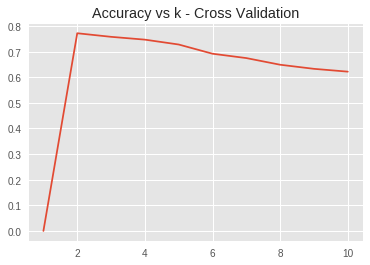

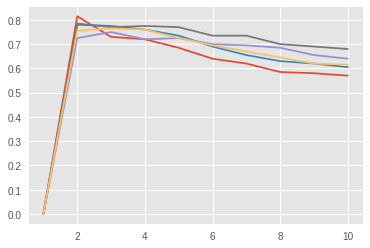

In [18]:
max_k = 10
k_fold = 5;


accuracy_vs_k = np.zeros(max_k)
log_acuracy_vs_k = np.zeros((k_fold, max_k))

n, d = X.shape
length_test = np.int( n / k_fold )

idx_begin = 0
idx_end = idx_begin + length_test

for i in range(k_fold):
  #monta os dados de entreda para treinamento
  X_train_p1 = X[0:idx_begin]
  X_train_p2 = X[idx_end:]
  X_train = np.concatenate((X_train_p1, X_train_p2))
  
  X_test = X[idx_begin:idx_end]
  
  y_train_p1 = y[0:idx_begin]
  y_train_p2 = y[idx_end:]  
  y_train = np.concatenate((y_train_p1, y_train_p2))
  
  y_test = y[idx_begin:idx_end]
  
  for k in range(1, max_k):  
    y_hat = knn(X_train, y_train, X_test, k)
    log_acuracy_vs_k[i][k] = (y_hat == y_test).mean()
    
  idx_begin = idx_end
  idx_end = idx_begin + length_test
  
accuracy_vs_k = np.mean(log_acuracy_vs_k, axis=0)

_ = plt.title('Accuracy vs k - Cross Validation')
plt.plot(np.linspace(1,10,10),accuracy_vs_k)

plt.figure(2)
for t in range(k_fold):
  plt.plot(np.linspace(1,10,10), log_acuracy_vs_k[t])

## Aplicação prática

Iremos agora aplicar o algoritmo do $kNN$ no problema de classificação de dígitos.

O código abaixo carrega a base de dados e armazena os valores dos pixels de cada um dos dígitos na matriz $X$ e o valor númerico do dígito correspondente no vetor $y$.

Em seguida, divide os dados em um conjunto de treinamento e um conjunto de teste.

In [0]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Utilize validação cruzada (*k-fold cross validation*, com 5 partições) e o algoritmo $kNN$ para classificar os dados.

Escolha o valor e $k$ com a maior acurácia média do conjunto de validação (plote o gráfico da acurácia do conjunto de validação em função de $k$).

Escolha o $k$ com o menor erro de validação e plote a acurácia do conjunto de testes.

In [33]:
y_hat = knn(X_train, y_train, X_test, 1)

accuracy = (y_hat == y_test).mean()
print('Acurácia: %.3f'% accuracy)

Acurácia: 0.989


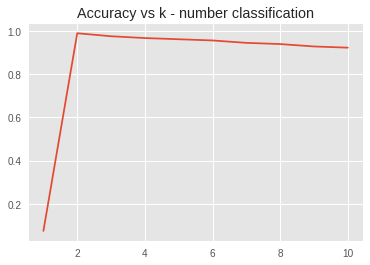

In [34]:
accuracy_vs_k = np.zeros(10)

for k in range(0, 10):
  y_hat = knn(X_train, y_train, X_test, k)
  
  accuracy_vs_k[k] = (y_hat == y_test).mean()

     
_ = plt.title('Accuracy vs k - number classification')
plt.plot(np.linspace(1,10,10),accuracy_vs_k)